# NEIDSpecMatch
The NEIDSpecMatch is a code to estimate the stellar parameters by comparing NEID spectra to a set of library stars. To estimate an arbitary star's parameters, we first need a local installation of NEIDSpecMatch. NEIDSpecMatch requires three packages: crosscorr, neidspec, and neidspecmatch, which can be installed with one command: 
```
pip install neidspecmatch
```
All dependencies should install automatically. If there are problems, please refer to the Installation section in the README. We then need to download and unzip the library. https://zenodo.org/records/14947454/files/20250226_specmatch_nir.zip?download=1
We recommend constructing a working directory like the git repo. The necessary folders are: 
```
neidsm_folder/
├── tutorial/                        # unzip 20250226_specmatch_nir.zip here
│   └── *.ipynb/                     # You can move this tutorial here for easy management
├── library/                         # unzip 20250226_specmatch_nir.zip here
│   ├── 20250226_specmatch_nir/      # the current library 
│   │   ├── FITS/                    # the fits files of the library stars
│   │   ├── crossval/                # the cross validation result done by the author
│   │   └── 20250226_78stars.csv     # the list of library star parameters
└── output/                          # output directory for results
```


In [1]:
import neidspecmatch
neidspecmatch.__version__

DIRNAME: /Users/tehan/PycharmProjects/neidspecmatch
/Users/tehan/PycharmProjects/neidspecmatch/library/20250226_specmatch_nir/FITS


'0.1.3'

# Cross-Validation 
We recommend to run the cross-validation test to make sure the local installation is performing as expected. To do so, you can run the following:

sn102 = 243.39114534332577
HD 75732, ra=133.1492, dec=28.3308, pmra=-485.681, pmdec=-233.517, rv=27.3940, px=79.4482, epoch=2451545.0 [111.53053586 111.42469576 111.30299448]
sn102 = 292.8654714297134
HD 3651, ra=9.8409, dec=21.2505, pmra=-461.948, pmdec=-369.624, rv=-32.8980, px=90.0248, epoch=2451545.0 [51.10686967 51.06913231 50.76875811]
sn102 = 488.42415898376174
HD 115617, ra=199.6013, dec=-18.3112, pmra=-1070.202, pmdec=-1063.849, rv=-7.8240, px=117.1726, epoch=2451545.0 [76.47321312 76.09473777 75.8563672 ]
sn102 = 218.8307339209732
HD 116442, ra=200.9131, dec=2.7233, pmra=12.467, pmdec=199.291, rv=28.4920, px=60.2817, epoch=2451545.0 [112.42185597 112.44215823 111.74197675]
sn102 = 330.14693307553057
HD 86728, ra=150.2527, dec=31.9237, pmra=-528.871, pmdec=-429.376, rv=57.5258, px=66.9958, epoch=2451545.0 [140.6988951  140.03524266 140.06634124]
sn102 = 354.8802043929063
HD 143761, ra=240.2611, dec=33.3035, pmra=-198.278, pmdec=-772.245, rv=17.9910, px=57.1076, epoch=2451545.0

KeyboardInterrupt: 

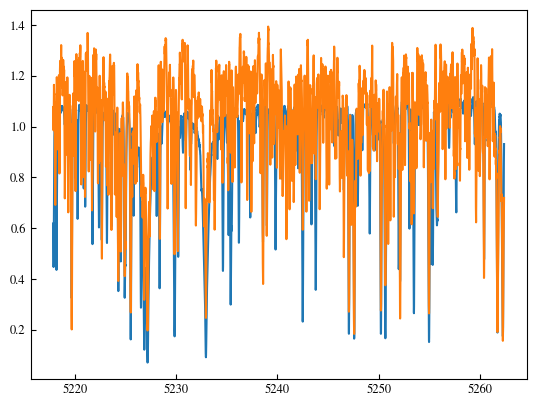

In [4]:
import neidspec
import neidspecmatch
import pandas as pd
import glob

# Define the base directory for NEID SpecMatch-related files
path_to_base = '/Users/tehan/Downloads/neidsm_folder/'
# Define the path to the CSV file containing the spectral library
path_df_lib = f'{path_to_base}library/20250226_specmatch_nir/20250226_78stars.csv' 
# Define the directory containing the FITS files for the spectral library
path_df_lib_fits = f'{path_to_base}library/20250226_specmatch_nir/FITS/'  
# Define the output directory for cross-validation results
path_crossval = f'{path_to_base}library/20250226_specmatch_nir/crossval/'  

# Load the spectral library parameters from the CSV file
df_lib = pd.read_csv(path_df_lib)  
# Initialize NEIDSpecList object with all available FITS files in the specified directory
HLS = neidspec.NEIDSpecList(filelist=sorted(glob.glob(path_df_lib_fits + '/*.fits')))  

# Define parameters for the cross-validation process
plot_results = True  # Enable result plotting
calibrate_feh = False  # Toggle [Fe/H] calibration
scaleres = 2.  # Set the scale multiplier on the residual

# Loop over spectral orders from 55 to 103 (inclusive)
for i in range(55, 104):  
    order = str(i)  # Convert order index to string format
    # Run cross-validation for the current spectral order
    neidspecmatch.run_crossvalidation_for_orders(order=order,
                                                 df_lib=df_lib,
                                                 HLS=HLS,
                                                 outputdir=path_crossval,
                                                 plot_results=plot_results,
                                                 calibrate_feh=calibrate_feh,
                                                 scaleres=scaleres)